In [259]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import operator 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# С учителем
Есть целевая переменная (ответ)

# Без учителя
Поиск закономерностей среди самих данных

# Частичное причастие учителя

# Подкрепление


In [263]:
car_df = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter=',')
car_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Как правило признаки хранятся в матрице, а целевые значения хранится в векторе

In [264]:
car_df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [265]:
car_df[["Mileage"]].shape, car_df["Price"].shape 

((804, 1), (804,))

In [266]:
X = car_df[["Mileage"]]
y = car_df["Price"]

In [249]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [267]:
# y = w0 * x + bios
model.coef_, model.intercept_

(array([-0.1725205]), np.float64(24764.559006061685))

In [277]:
predict = model.predict(np.array([[8221]]))
predict

array([23346.26795261])

In [269]:
(-0.1725205 * 8221) + 24764.559006061685

23346.267975561685

In [281]:
*car_df["Make"].unique(), len(car_df["Make"].unique())

('Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 6)

In [282]:
pd.get_dummies(car_df.loc[:, "Make"])

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
799,False,False,False,False,False,True
800,False,False,False,False,False,True
801,False,False,False,False,False,True
802,False,False,False,False,False,True


In [293]:
X = pd.get_dummies(car_df.loc[:, ["Mileage", "Liter", "Make"]])
y = pd.DataFrame(car_df["Price"])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,3.1,True,False,False,False,False,False
1,9135,3.1,True,False,False,False,False,False
2,13196,3.1,True,False,False,False,False,False
3,16342,3.1,True,False,False,False,False,False
4,19832,3.1,True,False,False,False,False,False


In [294]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [295]:
model.fit(X, y)


LinearRegression()

In [298]:
predict = model.predict(X)
predict

array([[20294.44250557],
       [20131.65686471],
       [19408.3828083 ],
       [18848.07249522],
       [18226.49493874],
       [17798.33664483],
       [17737.78181124],
       [17668.67805998],
       [17480.42376852],
       [16891.97326806],
       [22330.75313273],
       [21470.69639341],
       [21191.60985158],
       [20627.55938701],
       [19993.69276136],
       [19921.38316597],
       [19878.1042702 ],
       [19517.26870303],
       [18295.12967938],
       [17980.06644231],
       [22556.40893905],
       [22270.19829915],
       [21595.90241696],
       [21213.87265804],
       [20786.42677393],
       [20686.86750343],
       [20343.66407898],
       [20129.58493202],
       [19795.99903996],
       [19657.79153743],
       [22306.1298721 ],
       [22220.64069528],
       [21880.10880761],
       [21175.71361109],
       [20906.778909  ],
       [20759.48818144],
       [20621.81498626],
       [20342.72844443],
       [20286.26996724],
       [19831.57440802],


In [299]:
np.abs(predict - y).mean()

Price    2307.880053
dtype: float64

# Полиномиальная регрессия

In [313]:
X = 2 - 3 * np.random.normal(0, 1, 150) 
y = X - 2 * (X**2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 150) 

X = X[:, np.newaxis]
y = y[:, np.newaxis]

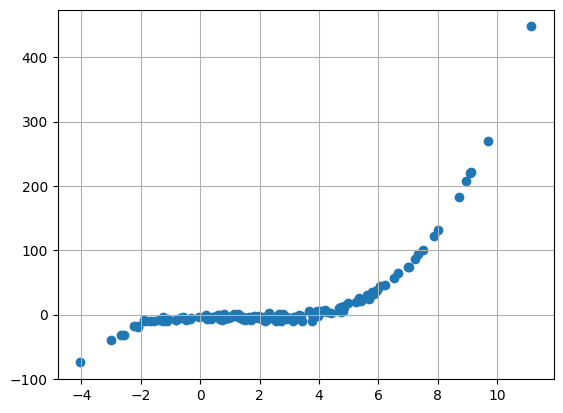

In [314]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [315]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

MSE: 40.26292077463683


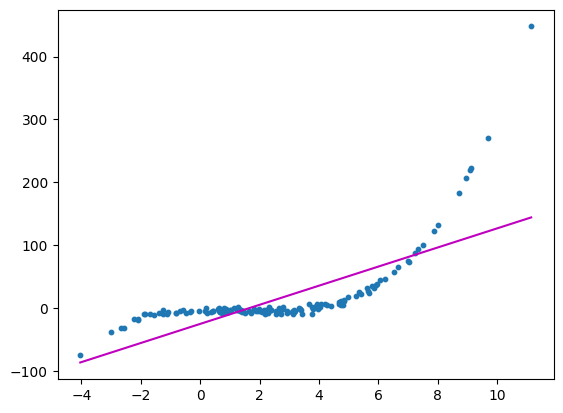

In [316]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"MSE: {rmse}")

plt.scatter(X, y, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_pred), key=sorted_axis)
x_, y_pred = zip(*sorted_zip)

plt.plot(x_, y_pred, color="m")
plt.show()

In [323]:
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)
X_poly.shape

(150, 4)

In [324]:
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

MSE: 3.022944990039146


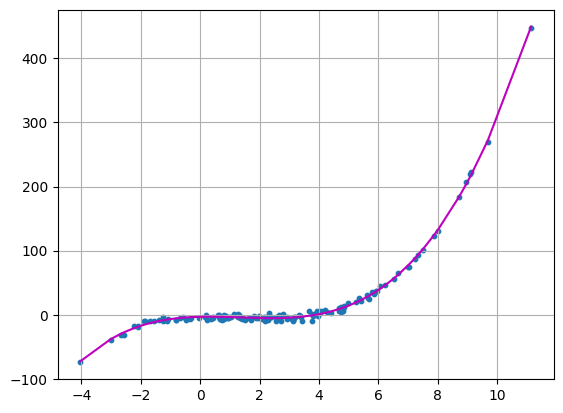

In [326]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
print(f"MSE: {rmse}")

plt.grid()
plt.scatter(X, y, s=10)

sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred), key=sorted_axis)
x_, y_pred = zip(*sorted_zip)

plt.plot(x_, y_pred, color="m")
plt.show()


In [327]:
model.coef_

array([[ 0.        ,  1.0364627 , -2.00293239,  0.49928917]])